In [1]:
import pymysql
from sqlalchemy.types import String, Float, Integer
from sqlalchemy import DateTime
from sqlalchemy import create_engine
from sqlalchemy import exc
import os
import re
import pandas as pd
import numpy as np
import datetime as dt#准备工作，配置环境。

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import datetime

from pylab import mpl
mpl.rcParams['font.sans-serif']=['KaiTi']
mpl.rcParams['axes.unicode_minus']=False

from matplotlib.backends.backend_pdf import PdfPages

In [2]:
from pylab import mpl
mpl.rcParams['font.sans-serif']=['KaiTi']
mpl.rcParams['axes.unicode_minus']=False

In [24]:
# 导入数据
conn = pymysql.connect(	
    host = '47.116.3.109',	
    user = 'dngj',	
    passwd = '603603',	
    db = 'finance',	
    port=3306,	
    charset = 'utf8'	
    )	
rates = pd.read_sql('select * from finance.rates1',conn)
rates_us = pd.read_sql('select * from finance.rates_us',conn)

In [25]:
rates

,国债1年,国债3年,国债5年,国债7年,国债10年,地方1年,地方3年,地方5年,地方7年,地方10年,...,国债3月,国债6月,国债20年,国开3月,国开6月,国开20年,国开30年,cd_3m_aaa+,国债2年,date
0,2.5850,2.7271,2.8674,3.0057,3.2096,NaN,NaN,NaN,NaN,NaN,...,2.5312,2.5492,3.8586,NaN,2.4262,4.2020,4.0462,NaN,2.6563,2002-01-04
1,2.6009,2.7380,2.8728,3.0055,3.2003,NaN,NaN,NaN,NaN,NaN,...,2.5489,2.5663,3.8140,NaN,2.4827,4.2375,4.0414,NaN,2.6697,2002-01-07
2,1.9156,2.3842,2.7890,3.1302,3.5225,NaN,NaN,NaN,NaN,NaN,...,1.7235,1.7885,3.7951,NaN,2.3470,4.3868,4.1288,NaN,2.1578,2002-01-08
3,1.9040,2.4036,2.8317,3.1884,3.5896,NaN,NaN,NaN,NaN,NaN,...,1.6983,1.7680,3.7660,NaN,2.3652,4.3702,4.0866,NaN,2.1627,2002-01-09
4,1.8987,2.3954,2.8216,3.1772,3.5784,NaN,NaN,NaN,NaN,NaN,...,1.6942,1.7635,3.7693,NaN,2.3688,4.3747,4.0863,NaN,2.1559,2002-01-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4862,2.5252,2.8089,2.9598,3.0763,3.0877,2.5446,3.0581,3.2363,3.3680,3.4354,...,1.9658,2.2010,3.5285,1.9967,2.3052,3.7184,3.9475,2.4200,2.7200,2021-06-22
4863,2.5012,2.7860,2.9514,3.0671,3.0853,2.5432,3.0454,3.2232,3.3672,3.4303,...,1.9509,2.1912,3.5185,1.9700,2.2672,3.7127,3.9175,2.4302,2.6949,2021-06-23
4864,2.4690,2.7675,2.9489,3.0714,3.0828,2.5229,3.0230,3.2156,3.3595,3.4157,...,1.9661,2.1948,3.5172,1.9825,2.2922,3.7123,3.8875,2.4221,2.6776,2021-06-24
4865,2.4437,2.7614,2.9506,3.0783,3.0827,2.4950,3.0147,3.2043,3.3553,3.4058,...,1.9151,2.1855,3.5122,1.9503,2.2549,3.7147,3.8775,2.4191,2.6655,2021-06-25


In [38]:
rates.index = rates['date']
rates1 = rates[['中票_AAA_1y', '中票_AAA_3y', '中票_AAA_5y','中票_AA+_1y', '中票_AA+_3y', '中票_AA+_5y','中票_AA_1y', '中票_AA_3y', '中票_AA_5y','中票_AA-_1y', '中票_AA-_3y', '中票_AA-_5y']]

In [39]:
rates1 = rates1.loc[rates1.index >= '2015-01-05']

In [40]:
rates1

,中票_AAA_1y,中票_AAA_3y,中票_AAA_5y,中票_AA+_1y,中票_AA+_3y,中票_AA+_5y,中票_AA_1y,中票_AA_3y,中票_AA_5y,中票_AA-_1y,中票_AA-_3y,中票_AA-_5y
date,,,,,,,,,,,,
2015-01-05,4.7064,4.7221,4.8469,5.2264,5.2521,5.3869,5.5864,5.6521,5.8669,6.6664,7.0221,7.4169
2015-01-06,4.6485,4.6826,4.8169,5.1685,5.2126,5.3569,5.5285,5.6126,5.8369,6.6085,6.9826,7.3869
2015-01-07,4.6374,4.6505,4.7992,5.1574,5.1805,5.3392,5.4974,5.5805,5.8192,6.5974,6.9505,7.3692
2015-01-08,4.6267,4.6405,4.7992,5.1267,5.1505,5.3192,5.4867,5.5705,5.8192,6.5867,6.9405,7.3692
2015-01-09,4.6170,4.6395,4.7692,5.0970,5.1295,5.2692,5.4570,5.5495,5.7892,6.5570,6.9195,7.3392
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-22,3.0313,3.4955,3.7783,3.1395,3.6742,3.9773,3.3395,4.0242,4.5173,5.5295,6.2142,6.7073
2021-06-23,3.0251,3.4958,3.7683,3.1433,3.6645,3.9673,3.3333,4.0145,4.5073,5.5233,6.2045,6.6973
2021-06-24,3.0130,3.4857,3.7631,3.1212,3.6444,3.9621,3.3212,4.0144,4.5021,5.5112,6.2044,6.6921


In [63]:
credit1  = rates1[-1:]
credit2 = rates1.describe()[4:7]
credit3 = rates1.loc[rates1.index == '2020-12-31']

In [113]:
credit = pd.concat([credit1,credit2,credit3],axis=0)
credit.index = [['现值','25分位数','中位数','75分位数','2020年底']]
#转置
credit= pd.DataFrame(credit.values.T, index=credit.columns, columns=credit.index)
# credit.index = [['AAA1y','AAA3y','AAA5y','AA+1y','AA+3y','AA+5y','AA1y','AA3y','AA5y','AA-1y','AA-3y','AA-5y']]
credit

,现值,25分位数,中位数,75分位数,2020年底
中票_AAA_1y,3.0051,3.0035,3.2550,4.1643,3.1406
中票_AAA_3y,3.4441,3.4235,3.7286,4.3305,3.5440
中票_AAA_5y,3.7282,3.7090,3.9799,4.4663,3.7975
中票_AA+_1y,3.1133,3.2362,3.4832,4.4749,3.4396
中票_AA+_3y,3.6028,3.6358,3.9600,4.6708,4.0229
中票_AA+_5y,3.9273,3.9898,4.2980,4.8953,4.3574
中票_AA_1y,3.3233,3.4659,3.8015,4.6883,3.8396
中票_AA_3y,4.0028,3.9784,4.3464,4.9996,4.3929
中票_AA_5y,4.4673,4.4677,4.7970,5.3199,4.7474
中票_AA-_1y,5.5133,5.1909,5.5437,5.9389,5.8896


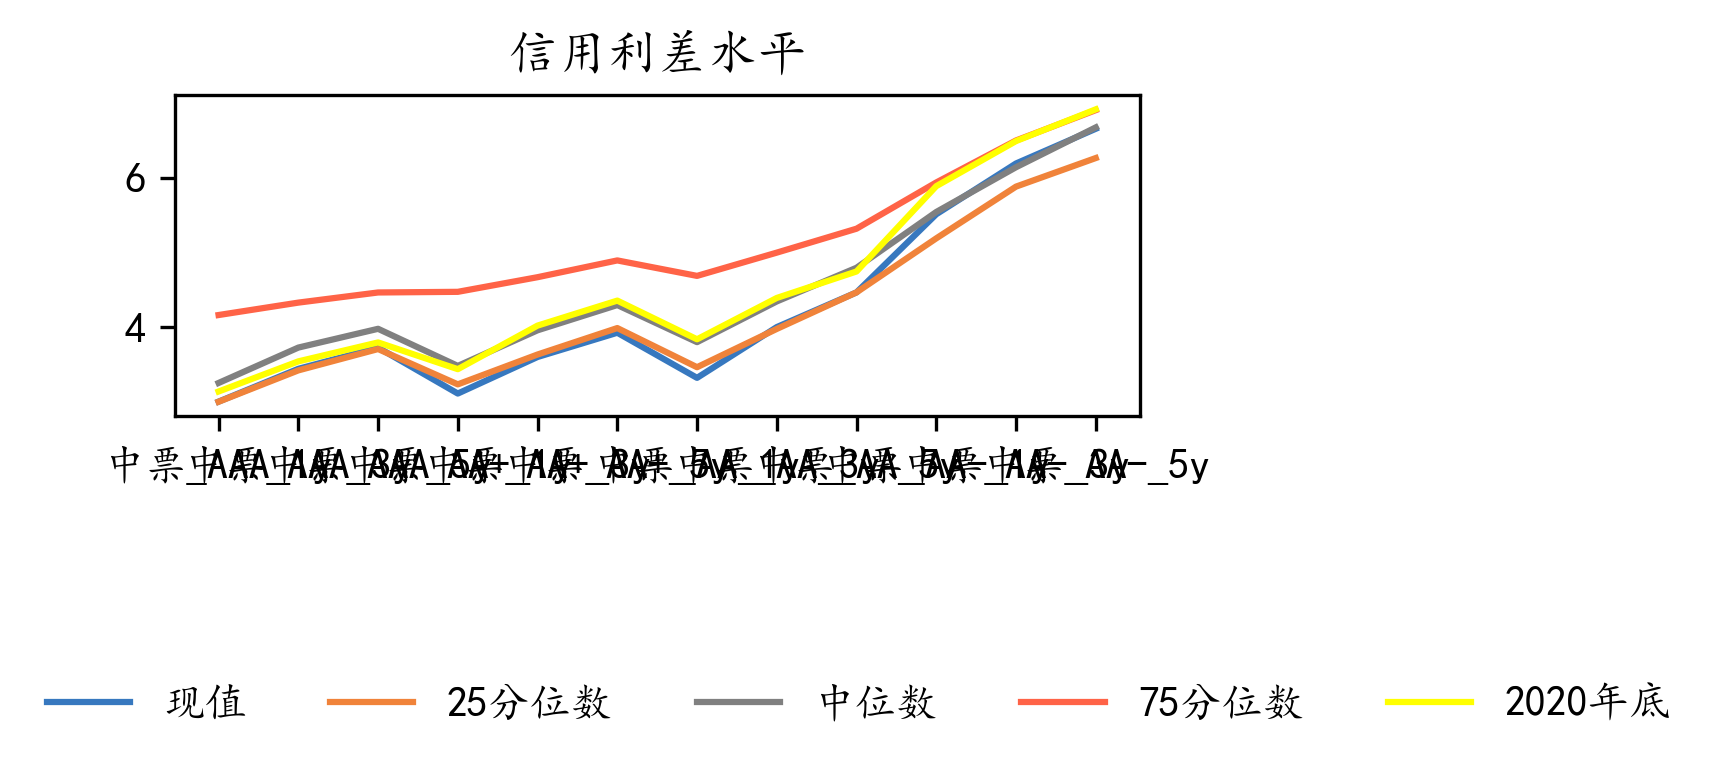

In [114]:
#信用利差水平
fig,ax = plt.subplots(figsize=(4.15,1.42),dpi = 300)
plt.plot(credit[['现值']],'#3778bf',label="现值")
plt.plot(credit[['25分位数']],'#f0833a',label='25分位数')
plt.plot(credit[['中位数']],'gray',label='中位数')
plt.plot(credit[['75分位数']],'tomato',label='75分位数')
plt.plot(credit[['2020年底']],'yellow',label='2020年底')

plt.title('信用利差水平', fontsize=12)
plt.xticks(fontsize=10 ,rotation=45)
#
plt.yticks(fontsize=10,rotation=0)
plt.legend(ncol=5,loc=3, bbox_to_anchor=(-0.15,-1),borderaxespad = 0.,fontsize=10,frameon=False)

# plt.savefig('信用利差水平.jpg', dpi=300, bbox_inches = 'tight')
plt.show()

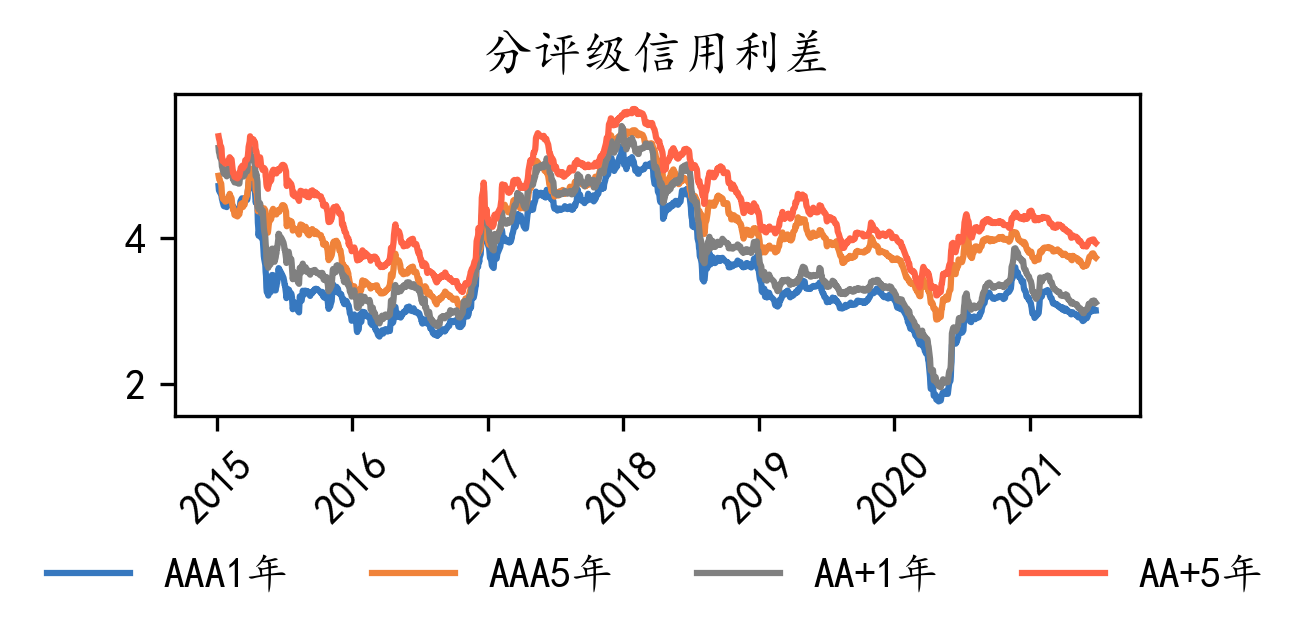

In [41]:
#分评级信用利差
fig,ax = plt.subplots(figsize=(4.15,1.42),dpi = 300)
plt.plot(rates1.index,rates1['中票_AAA_1y'],'#3778bf',label="AAA1年")
plt.plot(rates1.index,rates1['中票_AAA_5y'],'#f0833a',label='AAA5年')
plt.plot(rates1.index,rates1['中票_AA+_1y'],'gray',label='AA+1年')
plt.plot(rates1.index,rates1['中票_AA+_5y'],'tomato',label='AA+5年')

plt.title('分评级信用利差', fontsize=12)
plt.xticks(fontsize=10,rotation=45)
plt.yticks(fontsize=10,rotation=0)
plt.legend(ncol=4,loc=3, bbox_to_anchor=(-0.15,-0.6),borderaxespad = 0.,fontsize=10,frameon=False)
plt.savefig('分评级信用利差.jpg', dpi=300, bbox_inches = 'tight')
plt.show()